In [91]:
import datacube
import sys
import xarray as xr
import pandas as pd
import numpy as np
from datacube.storage import masking
from skimage import exposure
import matplotlib.pyplot as plt

sys.path.append('../Scripts')
from dea_plotting import rgb
from dea_plotting import display_map


from skimage.color import rgb2hsv, hsv2rgb
from skimage.filters import unsharp_mask

def hsv_image_processing(rgb_array,
                         hue_mult=1, 
                         sat_mult=1, 
                         val_mult=1,
                         unsharp_radius=10, 
                         unsharp_amount=1):   
    
    # Convert to HSV and multiply bands
    hsv_array = rgb2hsv(rgb_array)
    hsv_array[:, :, 0] = hsv_array[:, :, 0] * hue_mult
    hsv_array[:, :, 1] = hsv_array[:, :, 1] * sat_mult
    hsv_array[:, :, 2] = hsv_array[:, :, 2] * val_mult
    
    # Apply unsharp mask to value band only
    hsv_array[:, :, 2] = unsharp_mask(image=hsv_array[:, :, 2], 
                                      radius=unsharp_radius, 
                                      amount=unsharp_amount)
    
    # Convert back to RGB
    return hsv2rgb(hsv_array)


In [95]:
# East coast fires, tall
upper_left = -27.7500, 152.0000
lower_right = -30.8000, 155.2000
time_range = ('2019-09-08', '2019-09-10')
product = 's2a_nrt_granule'
bands = ['nbar_red', 'nbar_green', 'nbar_blue']
resolution = (-50, 50)
output_crs='EPSG:32756'
percentile_stretch = (3, 97)
log_transform = True

# East coast fires, zoom Clarence
upper_left = -29.380, 153.0776
lower_right = -29.6510, 153.5308
time_range = ('2019-09-08', '2019-09-10')
product = 's2a_nrt_granule'
bands = ['nbar_swir_3', 'nbar_nir_2', 'nbar_red']
resolution = (-20, 20)
output_crs='EPSG:32756'
percentile_stretch = (1, 99)
log_transform = False

# East coast fires, zoom
upper_left = -30.0000, 152.2360
lower_right = -30.1800, 152.4000
time_range = ('2019-09-08', '2019-09-10')
product = 's2a_nrt_granule'
bands = ['nbar_swir_3', 'nbar_nir_2', 'nbar_red']
resolution = (-20, 20)
output_crs='EPSG:32756'
percentile_stretch = (0.5, 99.5)
log_transform = False

# East coast fires, Byfield
upper_left = -21.4227, 149.7546
lower_right = -23.000, 151.1000
time_range = ('2019-09-08', '2019-09-10')
product = 's2b_nrt_granule'
bands = ['nbar_red', 'nbar_green', 'nbar_blue']
# bands = ['nbar_swir_3', 'nbar_nir_2', 'nbar_red']
resolution = (-40, 40)
output_crs='EPSG:32755'
percentile_stretch = (2, 99.99)
log_transform = True

# East coast fires, Byfield zoom
upper_left =  -22.4550, 150.520
lower_right = -22.7350, 150.820
time_range = ('2019-09-08', '2019-09-10')
product = 's2b_nrt_granule'
# bands = ['nbar_red', 'nbar_green', 'nbar_blue']
bands = ['nbar_swir_3', 'nbar_nir_2', 'nbar_red']
resolution = (-20, 20)
output_crs='EPSG:32755'
percentile_stretch = (1, 99)
power = 0.8

# East coast fires, zoom 14 Sep
upper_left = -30.01, 152.30158
lower_right = -30.15, 152.47084
time_range = ('2019-09-13', '2019-09-15')
product = 's2b_nrt_granule'
bands = ['nbar_red', 'nbar_green', 'nbar_blue']
# bands = ['nbar_swir_3', 'nbar_nir_2', 'nbar_red']
resolution = (-10, 10)
output_crs='EPSG:32755'
percentile_stretch = (1, 99)
power = 0.3

# Tasmania fires, 2016
upper_left = -41.22, 144.74
lower_right = -41.45, 145.26
time_range = ('2016-03-14', '2016-03-14')
product = 's2a_ard_granule'
# bands = ['nbar_red', 'nbar_green', 'nbar_blue']
bands = ['nbar_swir_3', 'nbar_nir_2', 'nbar_red']
resolution = (-10, 10)
output_crs='EPSG:32755'
percentile_stretch = (0.5, 99.5)
power = 0.8


# NBART comparison
upper_left = -37.07900, 145.07884
lower_right = -37.21756, 145.27370
time_range = ('2016-04-26', '2016-04-26')
product = 's2a_ard_granule'
bands = ['nbar_red', 'nbar_green', 'nbar_blue']
# bands = ['nbar_swir_3', 'nbar_nir_2', 'nbar_red']
resolution = (-20, 20)
output_crs='EPSG:32755'
percentile_stretch = (0.5, 99.5)
power = None

# Forster fires, 2019
upper_left = -29.1072, 151.3758
lower_right = -29.365, 151.8352
time_range = ('2019-11-11', '2019-11-11')
product = 's2a_nrt_granule'
# bands = ['nbar_red', 'nbar_green', 'nbar_blue']
bands = ['nbar_swir_3', 'nbar_nir_2', 'nbar_red']
resolution = (-20, 20)
output_crs='EPSG:32756'
percentile_stretch = (5, 98.4)
power = None

# Canberra fire
upper_left = -35.4597, 148.7372
lower_right = -35.9473, 149.1809
time_range = ('2020-02-03', '2020-02-05')
product = 's2b_nrt_granule'
# bands = ['nbar_red', 'nbar_green', 'nbar_blue']
bands = ['nbar_swir_3', 'nbar_swir_2', 'nbar_red']
resolution = (-10, 10)
output_crs='EPSG:32756'
percentile_stretch = (0.2, 99.8)
power = 0.5


# # Colour test
# upper_left = -28.47902, 153.12817
# lower_right = -28.88231, 153.65592
# time_range = ('2020-01-20', '2020-01-24')
# product = 's2b_nrt_granule'
# # bands = ['nbar_red', 'nbar_green', 'nbar_blue']
# bands = ['nbart_swir_3', 'nbart_nir_2', 'nbart_red']
# resolution = (-50, 50)
# output_crs='EPSG:32756'
# percentile_stretch = (2, 98.4)
# power = None


# # Botany Bay
# upper_left =  -33.9342, 151.1111
# lower_right = -34.0595, 151.2935
# time_range = ('2020-02-10', '2020-02-12')
# product = 's2b_nrt_granule'
# bands = ['nbar_red', 'nbar_green', 'nbar_blue']
# # bands = ['nbart_swir_3', 'nbart_nir_2', 'nbart_red']
# resolution = (-10, 10)
# output_crs='EPSG:32756'
# percentile_stretch = (1, 99)
# power = 0.5




# Plot area
display_map(y=(upper_left[0], lower_right[0]),
            x=(upper_left[1], lower_right[1]))


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [93]:
# Connect to the datacube
dc = datacube.Datacube(app='Sentinel2_plot')

# Load data
s2_data = dc.load(product=product,
                  measurements=bands,
                  y=(upper_left[0], lower_right[0]),
                  x=(upper_left[1], lower_right[1]),
                  time=time_range,
                  resolution=resolution,
                  output_crs=output_crs,
                  resampling='nearest',
                  group_by='solar_day')

# Mask out nodata
s2_data = masking.mask_invalid_data(s2_data)

# Print output
print(s2_data)

# fig, axes = plt.subplots(1, 2, figsize=(12, 8))
# s2_data.squeeze('time').to_array().plot.imshow(vmax=3000, ax=axes[0])
# (s2_data.squeeze('time') ** 0.5).to_array().plot.imshow(robust=True, ax=axes[1])
# # np.log10(s2_data.squeeze('time')).to_array().plot.imshow(vmin=2.7, vmax=3.6, ax=axes[1])


<xarray.Dataset>
Dimensions:      (time: 1, x: 4241, y: 5578)
Coordinates:
  * time         (time) datetime64[ns] 2020-02-04T00:06:39.679639
  * y            (y) float64 6.069e+06 6.069e+06 ... 6.014e+06 6.013e+06
  * x            (x) float64 1.131e+05 1.131e+05 ... 1.555e+05 1.555e+05
Data variables:
    nbar_swir_3  (time, y, x) float64 1.21e+03 1.21e+03 ... 3.736e+03 3.841e+03
    nbar_swir_2  (time, y, x) float64 1.89e+03 1.89e+03 ... 4.081e+03 4.156e+03
    nbar_red     (time, y, x) float64 2.678e+03 2.664e+03 ... 1.482e+03
Attributes:
    crs:      EPSG:32756


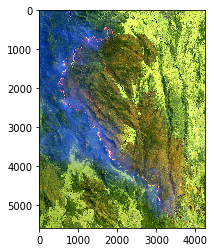

In [96]:
# Multiplier
# mult = exposure.adjust_sigmoid(s2_data.isel(time=0).nbar_swir_3 / 10000, cutoff=0.5, gain=20) + 1
mult = 1

# Convert to numpy array
rgb_array = np.transpose((s2_data.isel(time=0) * mult).to_array().values, axes=[1, 2, 0])

# Apply a log transform to improve colours
if power:
    rgb_array = rgb_array ** power

# Contrast stretching
p_low, p_high = np.nanpercentile(rgb_array, percentile_stretch)
rgb_rescaled = exposure.rescale_intensity(rgb_array.astype(np.float),
                                          in_range=(p_low, p_high),
                                          out_range=(0.0, 1.0))

# Apply coarse-scale unsharp masking
rgb_rescaled = hsv_image_processing(rgb_rescaled,
                                    unsharp_radius=150,
                                    unsharp_amount=0.2)

# HSV process
rgb_rescaled = hsv_image_processing(rgb_rescaled,
                                    val_mult=1.02,
                                    unsharp_radius=5,
                                    unsharp_amount=0.4)

# Plot RGB
plt.imshow(rgb_rescaled)

# Create unique file name
fname = f'{product[0:3]}_{time_range[0]}_{upper_left[0]:+.2f}_{upper_left[1]:.2f}_' \
        f'{lower_right[0]:+.2f}_{lower_right[1]:.2f}_{resolution[1]}m_nbar.png'

# Export to file
plt.imsave(fname=fname, arr=rgb_rescaled, format="png")


In [ ]:
# Create unique file name
fname = f'{product[0:3]}_{time_range[0]}_{upper_left[0]:+.2f}_{upper_left[1]:.2f}_' \
        f'{lower_right[0]:+.2f}_{lower_right[1]:.2f}_{resolution[1]}m.png'

rgb(np.log(s2_data),
    bands=bands,
    index=0,
    percentile_stretch=(0.02, 0.98),
    savefig_path=fname,
    size=20,
    savefig_kwargs={'dpi': 600})


In [72]:
from IPython.display import FileLink, FileLinks
FileLink(fname) 

/home/jovyan/dev/dea-notebooks/Testing/s2a_2016-03-14_-41.22_144.74_-41.45_145.26_10m.png

In [63]:
dc.list_products()

,name,description,fmask_cloud_shadow,eo_gsd,product_family,gqa_mean_x,gqa_iterative_mean_y,time,gqa,gqa_stddev_y,...,gqa_error_message,gqa_final_gcp_count,product_type,gqa_stddev_xy,gqa_mean_xy,gqa_abs_x,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,,,,,,,
10,fc_percentile_albers_annual,"Landsat Fractional Cover percentile 25 metre, ...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,fractional_cover_statistical_summary,NaN,NaN,NaN,EPSG:3577,"(-25, 25)","(100000.0, 100000.0)","(y, x)"
11,fc_percentile_albers_seasonal,"Landsat Fractional Cover percentile 25 metre, ...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,fractional_cover_seasonal_summary,NaN,NaN,NaN,EPSG:3577,"(-25, 25)","(100000.0, 100000.0)","(y, x)"
33,ga_ls5t_ard_3,Landsat 5 ARD,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,ga_ls7e_ard_3,Landsat 7 ARD,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,ga_ls8c_ard_3,Landsat 8 ARD,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,ga_s2a_ard_nbar_granule,Sentinel-2A MSI Definitive ARD - NBAR and Pixe...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,S2MSIARD_NBAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,ga_s2b_ard_nbar_granule,Sentinel-2B MSI Definitive ARD - NBAR and Pixe...,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,S2MSIARD_NBAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,high_tide_comp_20p,High tide 20 percentage composites 25m v. 2.0.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,tidal_composite,NaN,NaN,NaN,EPSG:3577,"(-25, 25)",None,"(y, x)"
27,item_v2,Relative Extents Model,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,item_v2.0.0,NaN,NaN,NaN,EPSG:3577,"(-25, 25)",None,"(y, x)"
